# Análisis Exploratorio de Datos (EDA) sobre el Dataset de Persuasión de Anthropic

![Logo de Anthropic](https://techcrunch.com/wp-content/uploads/2023/05/anthropic-header.jpg)

Este notebook contiene un análisis exploratorio de datos (EDA) del conjunto de datos de persuasión de Anthropic. El objetivo es entender la estructura del conjunto de datos, analizar las puntuaciones de persuasión y explorar patrones que puedan ayudar a comprender la efectividad de los argumentos generados por humanos y modelos de lenguaje.

### Objetivos del EDA

1. Comprender la estructura del conjunto de datos


2. Realizar un análisis descriptivo de las puntuaciones de persuasión

Pregunta:
 + ¿Cómo están distribuidas las métricas de persuasión (persuasiveness_metric)?
 + ¿Qué tan diferentes son las calificaciones iniciales y finales (rating_initial vs rating_final)?
 + ¿Cuál es la variabilidad de la persuasión?

3. Comparar la efectividad de los argumentos generados por humanos y por modelos

Preguntas:
 + ¿Hay diferencias significativas en la persuasión entre humanos y modelos?
 + ¿Qué fuente genera los argumentos más persuasivos?

4. Explorar el impacto de los diferentes tipos de prompts

Preguntas:
 + ¿Existen diferencias significativas en la persuasión según el tipo de prompt?
 + ¿Qué tipo de prompt genera los argumentos más persuasivos?

5. Realizar un análisis textual de los argumentos

Preguntas:
 + ¿La longitud del argumento (número de palabras) influye en la persuasión?
 + ¿Existen patrones en el tono emocional (sentimiento) del argumento que estén asociados con mayor persuasión?

6. Identificar factores clave que impactan la persuasión

Preguntas:
 + ¿Qué variables tienen el mayor impacto en la persuasión?
 + ¿El modelo (source), el tipo de prompt (prompt_type), o características textuales (longitud, sentimiento) afectan más la persuasión?
 + ¿Hay una combinación recurrente de modelo y prompt en los argumentos más efectivos?

7. Comparar el impacto temático en la persuasión

Preguntas:
 + ¿Qué combinaciones de modelo y prompt generan consistentemente puntuaciones de persuasión altas?
 + ¿Qué patrones textuales son comunes en los argumentos más persuasivos?
 + ¿Qué características del argumento están más asociadas con valores atípicos?

8. Conclusión del estudio

---


In [6]:
%pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 1. Comprender la estructura del conjunto de datos.

En este primer paso, cargaremos las librerías necesarias para el análisis y el dataset. También realizaremos una revisión inicial para entender su estructura y los tipos de datos.


In [260]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Configuración de gráficos
%matplotlib inline
sns.set(style="whitegrid")

# Cargar el dataset
df = pd.read_csv("hf://datasets/Anthropic/persuasion/persuasion_data.csv")

# Vista previa de las primeras filas y resumen de información
df.head()

,worker_id,claim,argument,source,prompt_type,rating_initial,rating_final,persuasiveness_metric
0,PQVTZECGNK3K,Governments and technology companies must do m...,It's time for governments and tech companies t...,Claude 2,Expert Writer Rhetorics,7 - Strongly support,7 - Strongly support,0
1,3KTT9HNPV9WX,Governments and technology companies must do m...,"In today's hyper-connected world, our personal...",Claude 3 Haiku,Expert Writer Rhetorics,7 - Strongly support,7 - Strongly support,0
2,M76GMRF46C69,Cultured/lab-grown meats should be allowed to ...,The future of food must include cultured/lab-g...,Claude 2,Compelling Case,3 - Somewhat oppose,5 - Somewhat support,2
3,3W4KKCTPTP7R,Social media companies should be required to l...,Social media companies should be required to l...,Claude 2,Compelling Case,3 - Somewhat oppose,6 - Support,3
4,QQDKMRY3HRXJ,Employers should be allowed to monitor employe...,Allowing employers to monitor employees throug...,Claude 3 Opus,Logical Reasoning,5 - Somewhat support,5 - Somewhat support,0


### Descripción del Conjunto de Datos

El conjunto de datos consta de un archivo CSV con las siguientes columnas:

- **worker_id**: ID del participante que anotó su postura inicial y final sobre el reclamo.
- **claim**: El argumento o declaración sobre el cual se expresa su postura.
- **argument**: El argumento generado, ya sea por un humano o un modelo de lenguaje para persuadir al usuario.
- **source**: La fuente del argumento (nombre del modelo o "Humano").
- **prompt_type**: El tipo de mensaje utilizado para generar el argumento.
- **rating_initial**: La calificación inicial del reclamo por parte del participante.
- **rating_final**: La calificación final del participante sobre la afirmación después de leer el argumento.
- **persuasiveness_metric**: La puntuación final del participante después de leer el argumento.


### Tipo de Fuente (que modelo se usó)
- **Humano**
- **Claude1.3**
- **Claude Instant 1.2**
- **Claude 2**
- **Claude 3 Opus**
- **Claude 3 Haiku**
### Tipo de prompt para generar el argumento `prompt_type`
- **Engañoso**: El argumento tiene elementos que pueden inducir al participante a error.
- **Razonamiento Lógico**: El argumento utiliza una secuencia de razonamientos para persuadir.
- **Retórica del escritor experto**: El argumento está formulado con un estilo sofisticado, como el de un escritor experto.
- **Caso Convincente**: El argumento está diseñado para ser especialmente convincente y sólido.
### Tabla de descripción de puntuaciones `rating`

| Puntuación | Descripción                |
|------------|----------------------------|
| 1          | Strongly oppose            |
| 2          | Oppose                     |
| 3          | Somewhat oppose            |
| 4          | Neither oppose nor support |
| 5          | Somewhat support           |
| 6          | Support                    |
| 7          | Strongly support           |





### Revisión Estructural del Dataset

A continuación, revisaremos la estructura del dataset. Esto incluye:
- Las primeras filas para observar el contenido.
- Información general para ver el tipo de datos y valores nulos.
- Nombres de columnas para facilitar futuras referencias.


In [261]:
# Mostrar información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   worker_id              3939 non-null   object
 1   claim                  3939 non-null   object
 2   argument               3939 non-null   object
 3   source                 3939 non-null   object
 4   prompt_type            3417 non-null   object
 5   rating_initial         3939 non-null   object
 6   rating_final           3939 non-null   object
 7   persuasiveness_metric  3939 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 246.3+ KB


In [262]:
# Mostrar nombres de las columnas
df.columns

Index(['worker_id', 'claim', 'argument', 'source', 'prompt_type',
       'rating_initial', 'rating_final', 'persuasiveness_metric'],
      dtype='object')

### Análisis de Valores Nulos y Duplicados

Es importante identificar si hay valores nulos o filas duplicadas en el dataset, ya que pueden afectar los análisis posteriores. 


In [263]:
# Comprobar valores nulos
df.isnull().sum()

# Comprobar filas duplicadas
total_nulos=df.duplicated().sum()

print(f"Total de valores nulos: {total_nulos}")


Total de valores nulos: 0


### Limpieza de Datos

En esta sección, convertiremos columnas a tipos de datos apropiados y limpiaremos valores inconsistentes para asegurar un análisis adecuado. Esto incluye:
- Conversión de columnas a tipos numéricos.
- Eliminación de valores que no se puedan interpretar como números.


In [264]:
# Convierto las puntuaciones en numeros para poder trabajar con ellas
# Extraer el número inicial en rating_initial y rating_final
df['rating_initial'] = df['rating_initial'].str.extract(r'(\d+)').astype(float)
df['rating_final'] = df['rating_final'].str.extract(r'(\d+)').astype(float)


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   worker_id              3939 non-null   object 
 1   claim                  3939 non-null   object 
 2   argument               3939 non-null   object 
 3   source                 3939 non-null   object 
 4   prompt_type            3417 non-null   object 
 5   rating_initial         3939 non-null   float64
 6   rating_final           3939 non-null   float64
 7   persuasiveness_metric  3939 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 246.3+ KB


---

# 2. Análisis Descriptivo de las Puntuaciones de Persuasión

En esta sección, analizaremos las puntuaciones de persuasión (`persuasiveness_metric`), así como las diferencias entre `rating_initial` y `rating_final`. Esto nos permitirá entender mejor la variación en la efectividad de los argumentos.

### Preguntas Clave
1. **¿Cómo están distribuidas las métricas de persuasión (`persuasiveness_metric`)?**
   - ¿Es una distribución simétrica o sesgada?
   - ¿Existen valores extremos (outliers)?

2. **¿Qué tan diferentes son las calificaciones iniciales y finales (`rating_initial` vs `rating_final`)?**
   - ¿Los participantes tienden a cambiar su postura después de leer los argumentos?

3. **¿Cuál es la variabilidad de la persuasión?**
   - ¿Qué tan dispersos están los valores de `persuasiveness_metric` entre los participantes?

A continuación, abordaremos cada pregunta con su análisis correspondiente.


### 1. ¿Cómo están distribuidas las métricas de persuasión (`persuasiveness_metric`)?
 *Propósito*: Identificar si los datos de persuasión tienen un sesgo, simetría o valores extremos, lo que puede influir en futuros análisis estadísticos.

In [265]:
# **Paso 1: Resumen Estadístico**

# Resumen estadístico de persuasiveness_metric
summary_persuasiveness = df['persuasiveness_metric'].describe()
print("Resumen estadístico de 'persuasiveness_metric':")
print(summary_persuasiveness)

# Calcular la asimetría (skewness)
skewness = df['persuasiveness_metric'].skew()
print(f"Asimetría (Skewness): {skewness:.2f}")

# **Paso 2: Detección de Outliers**
# Detectar valores extremos (outliers) utilizando el rango intercuartil (IQR)
iqr = summary_persuasiveness['75%'] - summary_persuasiveness['25%']  # Rango intercuartil
lower_bound = summary_persuasiveness['25%'] - 1.5 * iqr
upper_bound = summary_persuasiveness['75%'] + 1.5 * iqr

# Contar valores atípicos
outliers = df[(df['persuasiveness_metric'] < lower_bound) | (df['persuasiveness_metric'] > upper_bound)]
print(f"Número de valores atípicos: {len(outliers)}")

Resumen estadístico de 'persuasiveness_metric':
count    3939.00
mean        0.42
std         0.89
min        -2.00
25%         0.00
50%         0.00
75%         1.00
max         5.00
Name: persuasiveness_metric, dtype: float64
Asimetría (Skewness): 1.43
Número de valores atípicos: 136


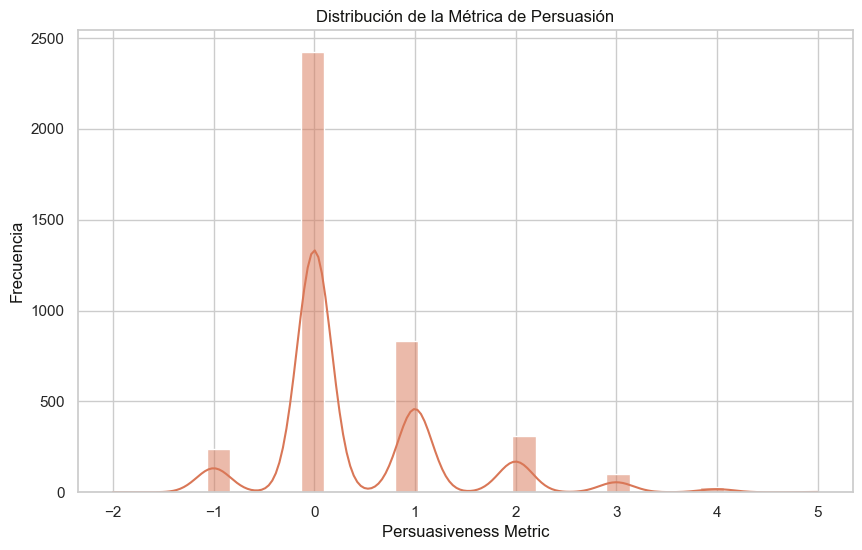

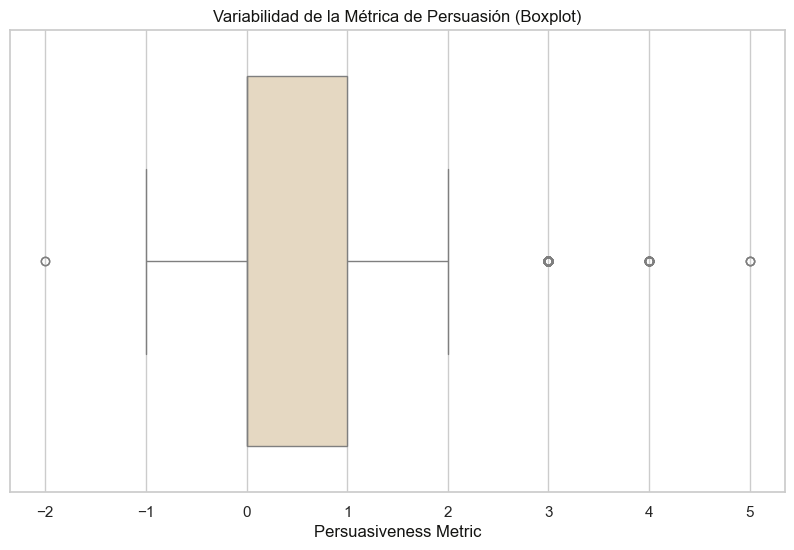

In [266]:
# Histograma de la métrica de persuasión
plt.figure(figsize=(10, 6))
sns.histplot(df['persuasiveness_metric'], kde=True, bins=30, color='#d97757')
plt.title('Distribución de la Métrica de Persuasión', color='#141412')
plt.xlabel('Persuasiveness Metric', color='#141412')
plt.ylabel('Frecuencia', color='#141412')
plt.show()

# Boxplot para identificar valores extremos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['persuasiveness_metric'], color='#ebdabc')
plt.title('Variabilidad de la Métrica de Persuasión (Boxplot)', color='#141412')
plt.xlabel('Persuasiveness Metric', color='#141412')
plt.show()


### Respuesta 1: ¿Cómo están distribuidas las métricas de persuasión (`persuasiveness_metric`)?**

### **1. ¿Es una distribución simétrica o sesgada?**
- **Asimetría (Skewness):** 1.43  
  - La distribución presenta una **asimetría positiva**, lo que significa que los valores tienden a acumularse hacia el lado izquierdo (cerca de 0), con una cola más larga hacia valores positivos.  
  - Esto indica que la mayoría de los participantes no experimentaron un cambio significativo en persuasión, pero hay un grupo más pequeño que sí tuvo cambios positivos más extremos.

- **Mediana (50%):** 0.0  
  - La mitad de las métricas de persuasión están en 0, lo que confirma que la mayoría de los argumentos no generaron cambios en la postura de los participantes.



### **2. ¿Existen valores extremos (outliers)?**
- **Valores Atípicos Detectados:** 136  
  - Estos valores están fuera del rango esperado, definido por el rango intercuartil (IQR).  
  - **Rango de Valores Atípicos:**  
    - **Inferior:** Menores a -2.  
    - **Superior:** Mayores a 3.  



### **3. Análisis Visual**
#### **Histograma:**
- La distribución tiene un pico alto en **0**, lo que representa la moda y confirma que la mayoría de los argumentos no lograron persuadir significativamente.
- Hay algunas puntuaciones dispersas hacia valores más positivos (> 0), lo que refleja un impacto persuasivo en un subconjunto más pequeño de participantes.

#### **Boxplot:**
- La mayor parte de los datos están concentrados entre **0** y **1**.
- Los valores atípicos están claramente marcados, principalmente en el extremo superior (> 3) y algunos pocos en el extremo inferior (< -2).



### **Conclusión General**
1. **Distribución Sesgada:**  
   - La métrica de persuasión está **asimétricamente sesgada hacia valores bajos**, lo que indica que la mayoría de los participantes no cambió su postura tras leer los argumentos.

2. **Presencia de Outliers:**  
   - Aunque el 50% de los datos está concentrado entre **0 y 1**, existen **136 valores atípicos**, principalmente positivos, que reflejan casos donde los argumentos tuvieron un impacto muy alto en la persuasión.

3. **Implicación:**  
   - La mayoría de los argumentos tienen un impacto bajo o nulo, pero un pequeño grupo de participantes muestra respuestas extremas a los argumentos, destacando la importancia de identificar qué características de los argumentos son más efectivas para persuadir.

### **Pregunta 2: ¿Qué tan diferentes son las calificaciones iniciales y finales (`rating_initial` vs `rating_final`)?**

#### **Propósito:**
Entender si los participantes cambian su postura después de leer los argumentos y evaluar la magnitud del cambio.

#### **Análisis:**
1. Visualizamos las distribuciones de `rating_initial` y `rating_final` para observar cómo cambian las calificaciones.
2. Calculamos la diferencia promedio entre `rating_final` y `rating_initial` para cuantificar el cambio.


In [267]:
# Calcular la moda para rating_initial y rating_final
mode_initial = df['rating_initial'].mode()[0]
mode_final = df['rating_final'].mode()[0]
print(f"Moda de rating_initial: {mode_initial}")
print(f"Moda de rating_final: {mode_final}")

# Contar las frecuencias de las calificaciones iniciales y finales
initial_counts = df['rating_initial'].value_counts()
final_counts = df['rating_final'].value_counts()
print("Frecuencia de rating_initial:")
print(initial_counts)
print("\nFrecuencia de rating_final:")
print(final_counts)

# Análisis de cambios por calificación
# Calcular diferencias para cada participante
df['change'] = df['rating_final'] - df['rating_initial']

# Promedio de cambio por calificación inicial
mean_change_by_initial = df.groupby('rating_initial')['change'].mean()
print("\nPromedio de cambio por calificación inicial:")
print(mean_change_by_initial)

# Identificar si los extremos (1 y 7) tienen menor cambio
low_change_extremes = mean_change_by_initial.loc[[1, 7]]
print("\nCambio promedio para los extremos (1 y 7):")
print(low_change_extremes)

# Analizar si los cambios son mayores en niveles intermedios (4, 5, 6)
mean_change_intermediate = mean_change_by_initial.loc[[4, 5, 6]]
print("\nCambio promedio para los niveles intermedios (4, 5, 6):")
print(mean_change_intermediate)


Moda de rating_initial: 4.0
Moda de rating_final: 6.0
Frecuencia de rating_initial:
rating_initial
4.0    706
6.0    671
5.0    630
2.0    579
3.0    534
7.0    491
1.0    328
Name: count, dtype: int64

Frecuencia de rating_final:
rating_final
6.0    895
7.0    737
5.0    650
3.0    464
2.0    458
4.0    446
1.0    289
Name: count, dtype: int64

Promedio de cambio por calificación inicial:
rating_initial
1.0    0.42
2.0    0.60
3.0    0.47
4.0    0.62
5.0    0.53
6.0    0.21
7.0   -0.03
Name: change, dtype: float64

Cambio promedio para los extremos (1 y 7):
rating_initial
1.0    0.42
7.0   -0.03
Name: change, dtype: float64

Cambio promedio para los niveles intermedios (4, 5, 6):
rating_initial
4.0    0.62
5.0    0.53
6.0    0.21
Name: change, dtype: float64


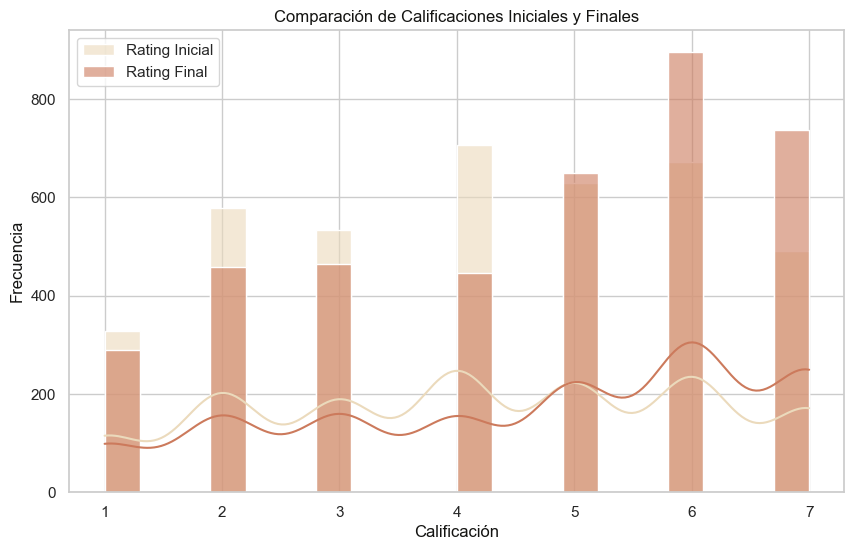

Diferencia promedio entre rating_final y rating_initial: 0.42


In [268]:
# Comparación de calificaciones iniciales y finales
plt.figure(figsize=(10, 6))
sns.histplot(df['rating_initial'], color='#ebdabc', label='Rating Inicial', kde=True, bins=20, alpha=0.6)
sns.histplot(df['rating_final'], color='#cc7a5c', label='Rating Final', kde=True, bins=20, alpha=0.6)
plt.title('Comparación de Calificaciones Iniciales y Finales', color='#141412')
plt.xlabel('Calificación', color='#141412')
plt.ylabel('Frecuencia', color='#141412')
plt.legend()
plt.show()

# Calcular la diferencia promedio entre calificaciones iniciales y finales
mean_difference = (df['rating_final'] - df['rating_initial']).mean()
print(f"Diferencia promedio entre rating_final y rating_initial: {mean_difference:.2f}")


### Respuesta 2: ¿Qué tan diferentes son las calificaciones iniciales y finales (`rating_initial` vs `rating_final`)?**

### **Conclusión**
1. **Moda (valor más frecuente):**
   - La moda de `rating_initial` es **4.0**, lo que indica que la mayoría de los participantes comenzaron con una postura neutral.
   - La moda de `rating_final` es **6.0**, lo que muestra que, tras leer los argumentos, los participantes tienden a adoptar una postura más favorable.

2. **Frecuencias de las Calificaciones:**
   - En las calificaciones iniciales, los niveles intermedios (**4.0, 5.0, y 6.0**) son los más comunes, representando la mayoría de los datos.
   - En las calificaciones finales, las posturas favorables (**6.0 y 7.0**) aumentan significativamente en frecuencia, lo que indica un desplazamiento hacia calificaciones más altas.

3. **Cambios Promedio por Nivel Inicial:**
   - Los participantes con una calificación inicial de **4.0** experimentaron un cambio promedio de **+0.62**, el más alto entre todas las categorías, lo que indica que son los más susceptibles a ser persuadidos.
   - Los participantes con una calificación inicial de **5.0** tuvieron un cambio promedio de **+0.53**, mostrando una respuesta moderada a la persuasión.
   - Los participantes con una calificación inicial de **6.0** experimentaron un cambio promedio menor (**+0.21**), lo que indica que las posturas ya favorables son menos susceptibles a cambios significativos.

4. **Posturas Extremas:**
   - Los participantes con calificaciones iniciales en los extremos (**1.0 y 7.0**) tienen menos cambios promedio, lo que indica que tienen posturas más firmes y son menos susceptibles a ser persuadidos.



### **Conclusión General**
- Las calificaciones finales son notablemente diferentes a las iniciales, con un desplazamiento hacia valores más altos. Esto sugiere que los argumentos son efectivos en persuadir a los participantes, especialmente aquellos con posturas intermedias, mientras que los extremos son más resistentes al cambio.





### **Pregunta 3: ¿Cuál es la variabilidad de la persuasión?**

#### **Propósito:**
Explorar qué tan dispersos están los valores de `persuasiveness_metric`, identificando si hay una tendencia generalizable o alta variabilidad en las respuestas.

#### **Análisis:**
1. Calculamos la desviación estándar (`std`) de `persuasiveness_metric`.
2. Utilizamos un boxplot para visualizar la dispersión y detectar valores extremos.


In [269]:
# Calcular la desviación estándar de persuasiveness_metric
std_persuasiveness = df['persuasiveness_metric'].std()
print(f"Desviación estándar de 'persuasiveness_metric': {std_persuasiveness:.2f}")

# Resumen estadístico para entender mejor la dispersión
summary_persuasiveness = df['persuasiveness_metric'].describe()
print("Resumen estadístico de 'persuasiveness_metric':")
print(summary_persuasiveness)

# Identificar valores atípicos
iqr = summary_persuasiveness['75%'] - summary_persuasiveness['25%']  # Rango intercuartil
lower_bound = summary_persuasiveness['25%'] - 1.5 * iqr
upper_bound = summary_persuasiveness['75%'] + 1.5 * iqr

outliers = df[(df['persuasiveness_metric'] < lower_bound) | (df['persuasiveness_metric'] > upper_bound)]
print(f"Número de valores atípicos: {len(outliers)}")

Desviación estándar de 'persuasiveness_metric': 0.89
Resumen estadístico de 'persuasiveness_metric':
count    3939.00
mean        0.42
std         0.89
min        -2.00
25%         0.00
50%         0.00
75%         1.00
max         5.00
Name: persuasiveness_metric, dtype: float64
Número de valores atípicos: 136


### **Conclusión General**
1. **Variabilidad Moderada:**  
   La dispersión en las puntuaciones de persuasión es moderada, con la mayoría de los valores concentrados entre **0 y 1**, lo que indica que los cambios en postura son, en general, pequeños o moderados.

2. **Presencia de Outliers:**  
   Aunque la mayoría de los participantes no experimentaron cambios significativos, hay **136 valores extremos** que representan casos de persuasión muy alta o impacto negativo.

3. **Distribución General:**  
   La distribución está centrada en **0**, mostrando que los argumentos frecuentemente no logran persuadir, aunque hay un número reducido de casos con cambios significativos.

---

# 2. Análisis Descriptivo de las Puntuaciones de Persuasión

En esta sección, analizaremos las puntuaciones de persuasión (`persuasiveness_metric`), así como las diferencias entre `rating_initial` y `rating_final`. Esto nos permitirá entender mejor la variación en la efectividad de los argumentos.

### Preguntas Clave
1. **¿Cómo están distribuidas las métricas de persuasión (`persuasiveness_metric`)?**
   - ¿Es una distribución simétrica o sesgada?
   - ¿Existen valores extremos (outliers)?

2. **¿Qué tan diferentes son las calificaciones iniciales y finales (`rating_initial` vs `rating_final`)?**
   - ¿Los participantes tienden a cambiar su postura después de leer los argumentos?

3. **¿Cuál es la variabilidad de la persuasión?**
   - ¿Qué tan dispersos están los valores de `persuasiveness_metric` entre los participantes?

A continuación, abordaremos cada pregunta con su análisis correspondiente.


### 1. ¿Cómo están distribuidas las métricas de persuasión (`persuasiveness_metric`)?
 *Propósito*: Identificar si los datos de persuasión tienen un sesgo, simetría o valores extremos, lo que puede influir en futuros análisis estadísticos.

In [280]:
# **Paso 1: Resumen Estadístico**

# Resumen estadístico de persuasiveness_metric
summary_persuasiveness = df['persuasiveness_metric'].describe()
print("Resumen estadístico de 'persuasiveness_metric':")
print(summary_persuasiveness)

# Calcular la asimetría (skewness)
skewness = df['persuasiveness_metric'].skew()
print(f"Asimetría (Skewness): {skewness:.2f}")

# **Paso 2: Detección de Outliers**
# Detectar valores extremos (outliers) utilizando el rango intercuartil (IQR)
iqr = summary_persuasiveness['75%'] - summary_persuasiveness['25%']  # Rango intercuartil
lower_bound = summary_persuasiveness['25%'] - 1.5 * iqr
upper_bound = summary_persuasiveness['75%'] + 1.5 * iqr

# Contar valores atípicos
outliers = df[(df['persuasiveness_metric'] < lower_bound) | (df['persuasiveness_metric'] > upper_bound)]
print(f"Número de valores atípicos: {len(outliers)}")

Resumen estadístico de 'persuasiveness_metric':
count    3939.00
mean        0.42
std         0.89
min        -2.00
25%         0.00
50%         0.00
75%         1.00
max         5.00
Name: persuasiveness_metric, dtype: float64
Asimetría (Skewness): 1.43
Número de valores atípicos: 136


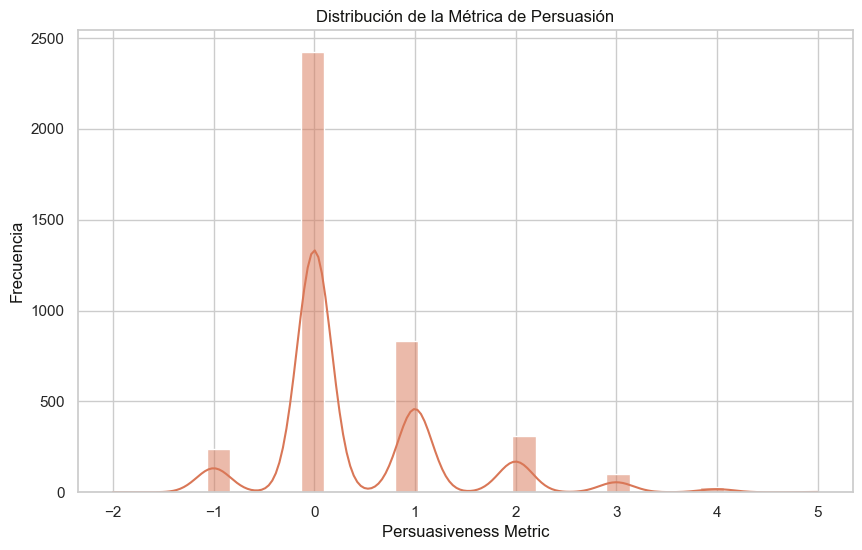

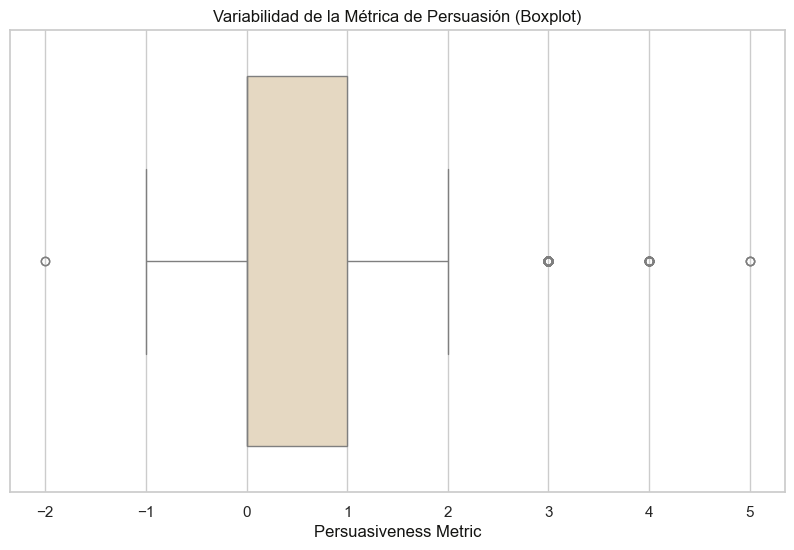

In [281]:
# Histograma de la métrica de persuasión
plt.figure(figsize=(10, 6))
sns.histplot(df['persuasiveness_metric'], kde=True, bins=30, color='#d97757')
plt.title('Distribución de la Métrica de Persuasión', color='#141412')
plt.xlabel('Persuasiveness Metric', color='#141412')
plt.ylabel('Frecuencia', color='#141412')
plt.show()

# Boxplot para identificar valores extremos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['persuasiveness_metric'], color='#ebdabc')
plt.title('Variabilidad de la Métrica de Persuasión (Boxplot)', color='#141412')
plt.xlabel('Persuasiveness Metric', color='#141412')
plt.show()


### Respuesta 1: ¿Cómo están distribuidas las métricas de persuasión (`persuasiveness_metric`)?**

### **1. ¿Es una distribución simétrica o sesgada?**
- **Asimetría (Skewness):** 1.43  
  - La distribución presenta una **asimetría positiva**, lo que significa que los valores tienden a acumularse hacia el lado izquierdo (cerca de 0), con una cola más larga hacia valores positivos.  
  - Esto indica que la mayoría de los participantes no experimentaron un cambio significativo en persuasión, pero hay un grupo más pequeño que sí tuvo cambios positivos más extremos.

- **Mediana (50%):** 0.0  
  - La mitad de las métricas de persuasión están en 0, lo que confirma que la mayoría de los argumentos no generaron cambios en la postura de los participantes.



### **2. ¿Existen valores extremos (outliers)?**
- **Valores Atípicos Detectados:** 136  
  - Estos valores están fuera del rango esperado, definido por el rango intercuartil (IQR).  
  - **Rango de Valores Atípicos:**  
    - **Inferior:** Menores a -2.  
    - **Superior:** Mayores a 3.  



### **3. Análisis Visual**
#### **Histograma:**
- La distribución tiene un pico alto en **0**, lo que representa la moda y confirma que la mayoría de los argumentos no lograron persuadir significativamente.
- Hay algunas puntuaciones dispersas hacia valores más positivos (> 0), lo que refleja un impacto persuasivo en un subconjunto más pequeño de participantes.

#### **Boxplot:**
- La mayor parte de los datos están concentrados entre **0** y **1**.
- Los valores atípicos están claramente marcados, principalmente en el extremo superior (> 3) y algunos pocos en el extremo inferior (< -2).



### **Conclusión General**
1. **Distribución Sesgada:**  
   - La métrica de persuasión está **asimétricamente sesgada hacia valores bajos**, lo que indica que la mayoría de los participantes no cambió su postura tras leer los argumentos.

2. **Presencia de Outliers:**  
   - Aunque el 50% de los datos está concentrado entre **0 y 1**, existen **136 valores atípicos**, principalmente positivos, que reflejan casos donde los argumentos tuvieron un impacto muy alto en la persuasión.

3. **Implicación:**  
   - La mayoría de los argumentos tienen un impacto bajo o nulo, pero un pequeño grupo de participantes muestra respuestas extremas a los argumentos, destacando la importancia de identificar qué características de los argumentos son más efectivas para persuadir.

### **Pregunta 2: ¿Qué tan diferentes son las calificaciones iniciales y finales (`rating_initial` vs `rating_final`)?**

#### **Propósito:**
Entender si los participantes cambian su postura después de leer los argumentos y evaluar la magnitud del cambio.

#### **Análisis:**
1. Visualizamos las distribuciones de `rating_initial` y `rating_final` para observar cómo cambian las calificaciones.
2. Calculamos la diferencia promedio entre `rating_final` y `rating_initial` para cuantificar el cambio.


In [282]:
# Calcular la moda para rating_initial y rating_final
mode_initial = df['rating_initial'].mode()[0]
mode_final = df['rating_final'].mode()[0]
print(f"Moda de rating_initial: {mode_initial}")
print(f"Moda de rating_final: {mode_final}")

# Contar las frecuencias de las calificaciones iniciales y finales
initial_counts = df['rating_initial'].value_counts()
final_counts = df['rating_final'].value_counts()
print("Frecuencia de rating_initial:")
print(initial_counts)
print("\nFrecuencia de rating_final:")
print(final_counts)

# Análisis de cambios por calificación
# Calcular diferencias para cada participante
df['change'] = df['rating_final'] - df['rating_initial']

# Promedio de cambio por calificación inicial
mean_change_by_initial = df.groupby('rating_initial')['change'].mean()
print("\nPromedio de cambio por calificación inicial:")
print(mean_change_by_initial)

# Identificar si los extremos (1 y 7) tienen menor cambio
low_change_extremes = mean_change_by_initial.loc[[1, 7]]
print("\nCambio promedio para los extremos (1 y 7):")
print(low_change_extremes)

# Analizar si los cambios son mayores en niveles intermedios (4, 5, 6)
mean_change_intermediate = mean_change_by_initial.loc[[4, 5, 6]]
print("\nCambio promedio para los niveles intermedios (4, 5, 6):")
print(mean_change_intermediate)


Moda de rating_initial: 4.0
Moda de rating_final: 6.0
Frecuencia de rating_initial:
rating_initial
4.0    706
6.0    671
5.0    630
2.0    579
3.0    534
7.0    491
1.0    328
Name: count, dtype: int64

Frecuencia de rating_final:
rating_final
6.0    895
7.0    737
5.0    650
3.0    464
2.0    458
4.0    446
1.0    289
Name: count, dtype: int64

Promedio de cambio por calificación inicial:
rating_initial
1.0    0.42
2.0    0.60
3.0    0.47
4.0    0.62
5.0    0.53
6.0    0.21
7.0   -0.03
Name: change, dtype: float64

Cambio promedio para los extremos (1 y 7):
rating_initial
1.0    0.42
7.0   -0.03
Name: change, dtype: float64

Cambio promedio para los niveles intermedios (4, 5, 6):
rating_initial
4.0    0.62
5.0    0.53
6.0    0.21
Name: change, dtype: float64


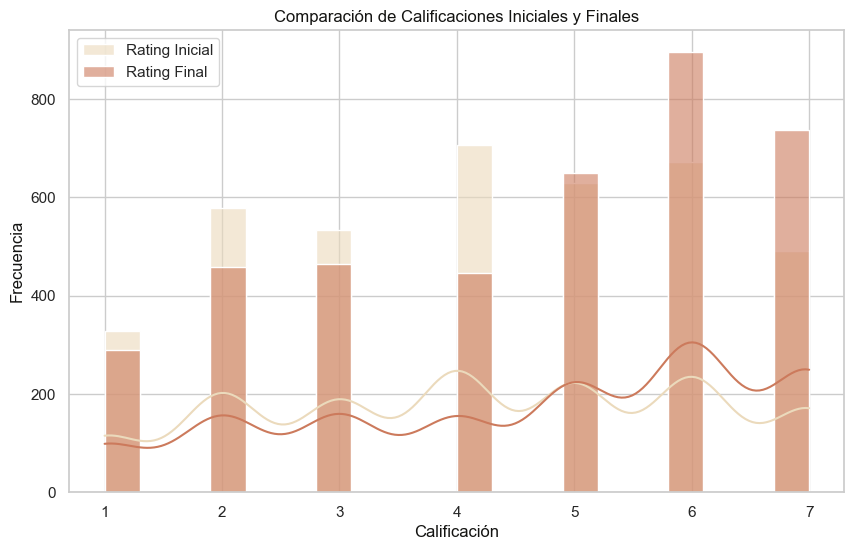

Diferencia promedio entre rating_final y rating_initial: 0.42


In [283]:
# Comparación de calificaciones iniciales y finales
plt.figure(figsize=(10, 6))
sns.histplot(df['rating_initial'], color='#ebdabc', label='Rating Inicial', kde=True, bins=20, alpha=0.6)
sns.histplot(df['rating_final'], color='#cc7a5c', label='Rating Final', kde=True, bins=20, alpha=0.6)
plt.title('Comparación de Calificaciones Iniciales y Finales', color='#141412')
plt.xlabel('Calificación', color='#141412')
plt.ylabel('Frecuencia', color='#141412')
plt.legend()
plt.show()

# Calcular la diferencia promedio entre calificaciones iniciales y finales
mean_difference = (df['rating_final'] - df['rating_initial']).mean()
print(f"Diferencia promedio entre rating_final y rating_initial: {mean_difference:.2f}")


### Respuesta 2: ¿Qué tan diferentes son las calificaciones iniciales y finales (`rating_initial` vs `rating_final`)?**

### **Conclusión**
1. **Moda (valor más frecuente):**
   - La moda de `rating_initial` es **4.0**, lo que indica que la mayoría de los participantes comenzaron con una postura neutral.
   - La moda de `rating_final` es **6.0**, lo que muestra que, tras leer los argumentos, los participantes tienden a adoptar una postura más favorable.

2. **Frecuencias de las Calificaciones:**
   - En las calificaciones iniciales, los niveles intermedios (**4.0, 5.0, y 6.0**) son los más comunes, representando la mayoría de los datos.
   - En las calificaciones finales, las posturas favorables (**6.0 y 7.0**) aumentan significativamente en frecuencia, lo que indica un desplazamiento hacia calificaciones más altas.

3. **Cambios Promedio por Nivel Inicial:**
   - Los participantes con una calificación inicial de **4.0** experimentaron un cambio promedio de **+0.62**, el más alto entre todas las categorías, lo que indica que son los más susceptibles a ser persuadidos.
   - Los participantes con una calificación inicial de **5.0** tuvieron un cambio promedio de **+0.53**, mostrando una respuesta moderada a la persuasión.
   - Los participantes con una calificación inicial de **6.0** experimentaron un cambio promedio menor (**+0.21**), lo que indica que las posturas ya favorables son menos susceptibles a cambios significativos.

4. **Posturas Extremas:**
   - Los participantes con calificaciones iniciales en los extremos (**1.0 y 7.0**) tienen menos cambios promedio, lo que indica que tienen posturas más firmes y son menos susceptibles a ser persuadidos.



### **Conclusión General**
- Las calificaciones finales son notablemente diferentes a las iniciales, con un desplazamiento hacia valores más altos. Esto sugiere que los argumentos son efectivos en persuadir a los participantes, especialmente aquellos con posturas intermedias, mientras que los extremos son más resistentes al cambio.





### **Pregunta 3: ¿Cuál es la variabilidad de la persuasión?**

#### **Propósito:**
Explorar qué tan dispersos están los valores de `persuasiveness_metric`, identificando si hay una tendencia generalizable o alta variabilidad en las respuestas.

#### **Análisis:**
1. Calculamos la desviación estándar (`std`) de `persuasiveness_metric`.
2. Utilizamos un boxplot para visualizar la dispersión y detectar valores extremos.


In [284]:
# Calcular la desviación estándar de persuasiveness_metric
std_persuasiveness = df['persuasiveness_metric'].std()
print(f"Desviación estándar de 'persuasiveness_metric': {std_persuasiveness:.2f}")

# Resumen estadístico para entender mejor la dispersión
summary_persuasiveness = df['persuasiveness_metric'].describe()
print("Resumen estadístico de 'persuasiveness_metric':")
print(summary_persuasiveness)

# Identificar valores atípicos
iqr = summary_persuasiveness['75%'] - summary_persuasiveness['25%']  # Rango intercuartil
lower_bound = summary_persuasiveness['25%'] - 1.5 * iqr
upper_bound = summary_persuasiveness['75%'] + 1.5 * iqr

outliers = df[(df['persuasiveness_metric'] < lower_bound) | (df['persuasiveness_metric'] > upper_bound)]
print(f"Número de valores atípicos: {len(outliers)}")

Desviación estándar de 'persuasiveness_metric': 0.89
Resumen estadístico de 'persuasiveness_metric':
count    3939.00
mean        0.42
std         0.89
min        -2.00
25%         0.00
50%         0.00
75%         1.00
max         5.00
Name: persuasiveness_metric, dtype: float64
Número de valores atípicos: 136


### **Conclusión General**
1. **Variabilidad Moderada:**  
   La dispersión en las puntuaciones de persuasión es moderada, con la mayoría de los valores concentrados entre **0 y 1**, lo que indica que los cambios en postura son, en general, pequeños o moderados.

2. **Presencia de Outliers:**  
   Aunque la mayoría de los participantes no experimentaron cambios significativos, hay **136 valores extremos** que representan casos de persuasión muy alta o impacto negativo.

3. **Distribución General:**  
   La distribución está centrada en **0**, mostrando que los argumentos frecuentemente no logran persuadir, aunque hay un número reducido de casos con cambios significativos.

---

## Apartado 3: Comparar la Efectividad de los Argumentos Generados por Humanos y por Modelos

### **Propósito**
Evaluar si existen diferencias significativas en la efectividad de los argumentos según su fuente (`source`), es decir, comparar la métrica de persuasión (`persuasiveness_metric`) entre los argumentos generados por humanos y por modelos de lenguaje.



### **Preguntas Clave**
1. **¿Hay diferencias significativas en la persuasión entre humanos y modelos?**
2. **¿Qué fuente genera los argumentos más persuasivos?**



#### Importamos las librerias necesarias

In [285]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


#### **Paso 1: Estadísticas Descriptivas**
1. Calcular la media y desviación estándar de `persuasiveness_metric` para cada fuente (`source`).
2. Identificar si los humanos o los modelos generan puntuaciones más altas, en promedio.


In [286]:
mean_by_source = df.groupby('source')['persuasiveness_metric'].mean()
std_by_source = df.groupby('source')['persuasiveness_metric'].std()
print("Media de persuasiveness_metric por fuente:")
print(mean_by_source)
print("\nDesviación estándar de persuasiveness_metric por fuente:")
print(std_by_source)

Media de persuasiveness_metric por fuente:
source
Claude 1.3            0.34
Claude 2              0.42
Claude 3 Haiku        0.43
Claude 3 Opus         0.48
Claude Instant 1.2    0.33
Control               0.07
Human                 0.54
Name: persuasiveness_metric, dtype: float64

Desviación estándar de persuasiveness_metric por fuente:
source
Claude 1.3            0.88
Claude 2              0.89
Claude 3 Haiku        0.87
Claude 3 Opus         0.95
Claude Instant 1.2    0.86
Control               0.42
Human                 0.88
Name: persuasiveness_metric, dtype: float64


#### **Paso 2: Análisis Estadístico**
1. Realizar un análisis de varianza (ANOVA) para evaluar si las diferencias entre las fuentes son significativas.
2. Si el ANOVA encuentra diferencias significativas, realizar una prueba post-hoc (Tukey HSD) para identificar cuáles fuentes difieren entre sí.

In [287]:
groups_by_source = [df[df['source'] == source]['persuasiveness_metric'].dropna() for source in df['source'].unique()]
f_stat, p_value = f_oneway(*groups_by_source)
print("\nANOVA por fuente:")
print(f"F-statístico: {f_stat}, P-valor: {p_value}")
if p_value < 0.05:
    tukey_result = pairwise_tukeyhsd(endog=df['persuasiveness_metric'], groups=df['source'], alpha=0.05)
    print("\nPrueba post-hoc (Tukey HSD):")
    print(tukey_result)


ANOVA por fuente:
F-statístico: 5.554732209361546, P-valor: 9.57594768746351e-06

Prueba post-hoc (Tukey HSD):
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
        Claude 1.3           Claude 2   0.0804 0.6382 -0.0618  0.2225  False
        Claude 1.3     Claude 3 Haiku   0.0908 0.4916 -0.0514   0.233  False
        Claude 1.3      Claude 3 Opus   0.1384 0.0625 -0.0038  0.2806  False
        Claude 1.3 Claude Instant 1.2  -0.0089    1.0 -0.1511  0.1333  False
        Claude 1.3            Control  -0.2736  0.272 -0.6331   0.086  False
        Claude 1.3              Human   0.1965 0.0027  0.0444  0.3485   True
          Claude 2     Claude 3 Haiku   0.0104    1.0 -0.1318  0.1526  False
          Claude 2      Claude 3 Opus    0.058 0.8929 -0.0842  0.2002  False
          Claude 2 Claude Instant 1.2  -0

#### **Paso 3: Visualización**
1. Utilizar un boxplot para comparar la distribución de `persuasiveness_metric` entre las fuentes.

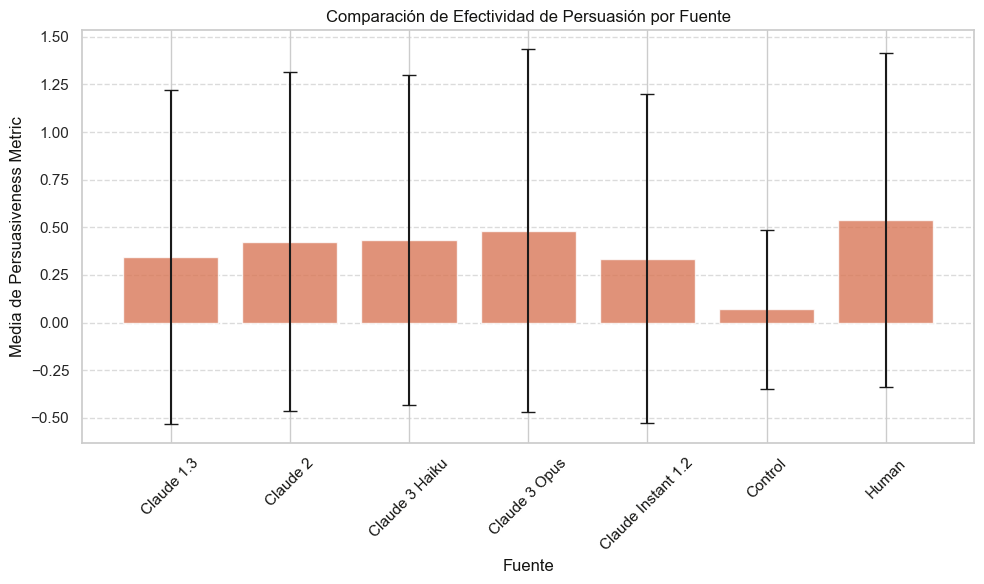

In [288]:

source_stats = df.groupby('source')['persuasiveness_metric'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(source_stats['source'], source_stats['mean'], yerr=source_stats['std'], color='#d97757', alpha=0.8, capsize=5)
plt.title('Comparación de Efectividad de Persuasión por Fuente', color='#141412')
plt.xlabel('Fuente', color='#141412')
plt.ylabel('Media de Persuasiveness Metric', color='#141412')
plt.xticks(rotation=45, color='#141412')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Respuesta: Comparar la Efectividad de los Argumentos Generados por Humanos y por Modelos

### **1. ¿Hay diferencias significativas en la persuasión entre humanos y modelos?**
- Sí, la prueba ANOVA confirma que existen **diferencias estadísticamente significativas** entre las fuentes de los argumentos (`F-statístico: 5.55`, `P-valor: 9.58e-06`).
- La prueba post-hoc (Tukey HSD) identifica que:
  - Los **argumentos generados por humanos** son significativamente más persuasivos que los generados por **Claude 1.3** y **Claude Instant 1.2**.
  - Los humanos también son significativamente más efectivos que los argumentos de **Control**, que tienen un impacto casi nulo.



### **2. ¿Qué fuente genera los argumentos más persuasivos?**
- Los **humanos** generan los argumentos más persuasivos, con una media de `persuasiveness_metric` de **0.54**.
- Entre los modelos, **Claude 3 Opus** es el más efectivo, con una media de **0.48**, aunque las diferencias con humanos no resultaron estadísticamente significativas en la prueba Tukey HSD.



### **Resultados Clave del Post-hoc (Tukey HSD):**
1. **Human vs Modelos:**
   - Los humanos son significativamente más persuasivos que:
     - **Claude 1.3** (`P-valor: 0.0027`).
     - **Claude Instant 1.2** (`P-valor: 0.0013`).
     - **Control** (`P-valor: 0.0027`).

2. **Entre Modelos:**
   - **Claude 3 Opus**(Modelo mas avanzado): es significativamente más persuasivo que:
     - **Claude Instant 1.2** (`P-valor: 0.0366`).
     - **Control** (`P-valor: 0.013`).
   - **Claude 3 Haiku** también supera significativamente al grupo **Control** (`P-valor: 0.0446`).

3. **Control:**  
   - El grupo **Control** tiene un impacto significativamente menor que casi todas las fuentes activas (Human, Claude 3 Opus, Claude 3 Haiku).


### **Conclusión General**
- **Humanos:** Los argumentos generados por humanos son significativamente más efectivos que varios modelos de lenguaje, especialmente los de menor desempeño como **Claude 1.3** y **Claude Instant 1.2**.
- **Modelos:** Entre los modelos, **Claude 3 Opus** destaca como el más persuasivo, aunque no alcanza el nivel de efectividad de los humanos. 
- **Control:** Los argumentos sin intervención (Control) son significativamente menos efectivos, confirmando la importancia de la fuente en la persuasión.


---


## Apartado 4: Explorar el Impacto de los Diferentes Tipos de Prompts

### **Propósito**
Evaluar cómo el tipo de prompt (`prompt_type`) afecta la métrica de persuasión (`persuasiveness_metric`) y determinar si ciertos prompts son más efectivos que otros para persuadir a los participantes.



### **Preguntas Clave**
1. ¿Existen diferencias significativas en la persuasión según el tipo de prompt?  
2. ¿Qué tipo de prompt genera los argumentos más persuasivos?  






#### **Paso 1: Estadísticas Descriptivas**
1. Calcular la media y desviación estándar de `persuasiveness_metric` para cada tipo de prompt (`prompt_type`).
2. Identificar si hay un tipo de prompt que destaque en promedio.


In [289]:
mean_by_prompt = df.groupby('prompt_type')['persuasiveness_metric'].mean()
std_by_prompt = df.groupby('prompt_type')['persuasiveness_metric'].std()
print("Media de persuasiveness_metric por tipo de prompt:")
print(mean_by_prompt)
print("\nDesviación estándar de persuasiveness_metric por tipo de prompt:")
print(std_by_prompt)

Media de persuasiveness_metric por tipo de prompt:
prompt_type
Compelling Case            0.40
Control Prompt             0.07
Deceptive                  0.47
Expert Writer Rhetorics    0.30
Logical Reasoning          0.45
Name: persuasiveness_metric, dtype: float64

Desviación estándar de persuasiveness_metric por tipo de prompt:
prompt_type
Compelling Case            0.89
Control Prompt             0.42
Deceptive                  0.91
Expert Writer Rhetorics    0.85
Logical Reasoning          0.90
Name: persuasiveness_metric, dtype: float64


#### **Paso 2: Análisis Estadístico**
1. Realizar un análisis de varianza (ANOVA) para evaluar si las diferencias entre los tipos de prompt son significativas.
2. Si el ANOVA encuentra diferencias significativas, realizar una prueba post-hoc (Tukey HSD) para identificar qué tipos de prompts difieren entre sí.


In [290]:
valid_prompts = df['prompt_type'].value_counts()[df['prompt_type'].value_counts() >= 100].index
filtered_df = df[df['prompt_type'].isin(valid_prompts)]

# ANOVA por tipo de prompt
groups_by_prompt = [filtered_df[filtered_df['prompt_type'] == prompt]['persuasiveness_metric'].dropna() for prompt in valid_prompts]
f_stat_prompt, p_value_prompt = f_oneway(*groups_by_prompt)
print("\nANOVA por tipo de prompt:")
print(f"F-statístico: {f_stat_prompt}, P-valor: {p_value_prompt}")

# Prueba post-hoc (Tukey HSD) si hay diferencias significativas
if p_value_prompt < 0.05:
    tukey_result_prompt = pairwise_tukeyhsd(endog=filtered_df['persuasiveness_metric'], groups=filtered_df['prompt_type'], alpha=0.05)
    print("\nPrueba post-hoc (Tukey HSD):")
    print(tukey_result_prompt)



ANOVA por tipo de prompt:
F-statístico: 5.819280757459608, P-valor: 0.0005805258800351372

Prueba post-hoc (Tukey HSD):
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------
        Compelling Case               Deceptive   0.0726 0.3384  -0.039  0.1842  False
        Compelling Case Expert Writer Rhetorics  -0.0952 0.1252 -0.2068  0.0164  False
        Compelling Case       Logical Reasoning   0.0476 0.6916  -0.064  0.1592  False
              Deceptive Expert Writer Rhetorics  -0.1679 0.0007 -0.2795 -0.0563   True
              Deceptive       Logical Reasoning   -0.025 0.9393 -0.1366  0.0866  False
Expert Writer Rhetorics       Logical Reasoning   0.1429 0.0056  0.0313  0.2545   True
--------------------------------------------------------------------------------------


#### **Paso 3: Visualización**
1. Utilizar un boxplot para comparar la distribución de `persuasiveness_metric` entre los diferentes tipos de prompts.

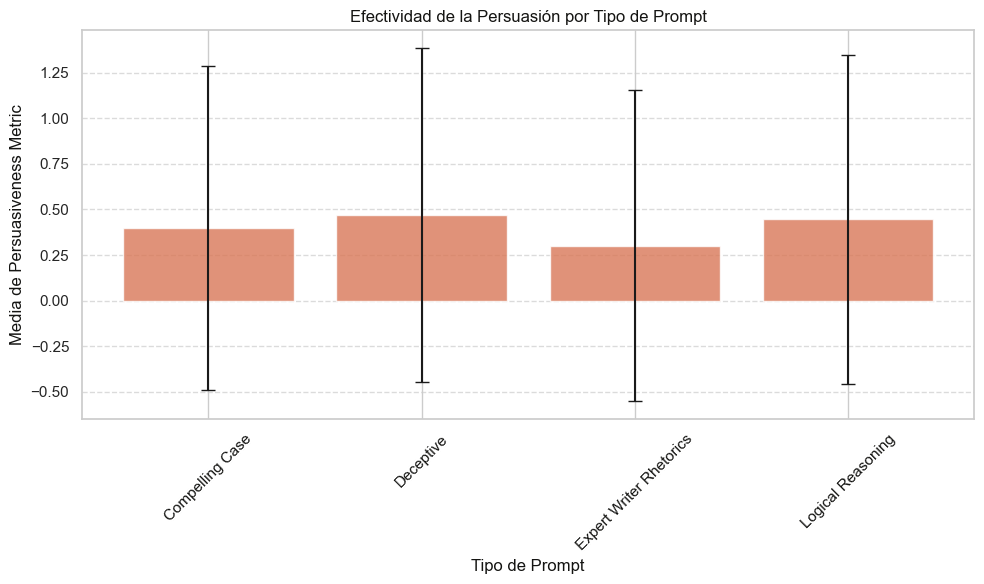

In [291]:
prompt_stats = filtered_df.groupby('prompt_type')['persuasiveness_metric'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(prompt_stats['prompt_type'], prompt_stats['mean'], yerr=prompt_stats['std'], color='#d97757', alpha=0.8, capsize=5)
plt.title('Efectividad de la Persuasión por Tipo de Prompt', color='#141412')
plt.xlabel('Tipo de Prompt', color='#141412')
plt.ylabel('Media de Persuasiveness Metric', color='#141412')
plt.xticks(rotation=45, color='#141412')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Respuesta: Explorar el Impacto de los Diferentes Tipos de Prompts

### **1. ¿Existen diferencias significativas en la persuasión según el tipo de prompt?**
- **ANOVA:**  
  - **F-statístico:** 5.82  
  - **P-valor:** 0.00058  
  - Este resultado confirma que existen **diferencias estadísticamente significativas** en la efectividad de la persuasión según el tipo de prompt.

- **Prueba Post-hoc (Tukey HSD):**  
  - Las diferencias significativas se encuentran en los siguientes pares:
    - **Deceptive vs Expert Writer Rhetorics:**  
      - **Diferencia Promedio:** -0.1679  
      - **P-valor:** 0.0007  
      - Esto muestra que el prompt **Deceptive** es significativamente más efectivo que **Expert Writer Rhetorics**.  
    - **Expert Writer Rhetorics vs Logical Reasoning:**  
      - **Diferencia Promedio:** 0.1429  
      - **P-valor:** 0.0056  
      - Esto indica que **Logical Reasoning** es significativamente más efectivo que **Expert Writer Rhetorics**.



### **2. ¿Qué tipo de prompt genera los argumentos más persuasivos?**
- **Media de `persuasiveness_metric` por Prompt:**
  1. **Deceptive:** 0.47 (más efectivo en promedio).  
  2. **Logical Reasoning:** 0.45.  
  3. **Compelling Case:** 0.40.  
  4. **Expert Writer Rhetorics:** 0.30.  
  5. **Control Prompt:** 0.07 (menos efectivo).  

- **Desviación Estándar:**  
  - Todos los tipos de prompt tienen una desviación estándar similar (~0.85-0.90), excepto **Control Prompt** (~0.42), lo que sugiere que los resultados del grupo de control son menos variables.



### **Conclusiones**
1. **Efectividad del Prompt:**
   - **Deceptive** es el tipo de prompt más efectivo en promedio, seguido de **Logical Reasoning**. Ambos destacan frente a los demás en cuanto a persuasión.

2. **Diferencias Significativas:**
   - Los prompts **Deceptive** y **Logical Reasoning** son significativamente más efectivos que **Expert Writer Rhetorics**, pero no hay diferencias significativas entre los demás pares de prompts.

3. **Control Prompt:**
   - Como era de esperar, **Control Prompt** tiene el impacto más bajo en la persuasión, con una media muy baja y menor variabilidad.



### **Implicaciones**
- Los prompts que apelan a un razonamiento lógico o que tienen elementos engañosos son más efectivos en persuadir a los participantes.
- Los prompts diseñados con retórica de "escritor experto" parecen ser menos efectivos, lo que podría indicar que un estilo sofisticado no necesariamente se traduce en persuasión.

---

## Apartado 5: Realizar un Análisis Textual de los Argumentos

### **Propósito**
Examinar las características textuales de los argumentos (`argument`) para identificar patrones relacionados con la persuasión. Esto incluye la longitud de los argumentos, análisis de sentimiento, y la relación entre características textuales y la métrica de persuasión (`persuasiveness_metric`).



### **Preguntas Clave**
1. ¿La longitud del argumento (número de palabras) influye en la persuasión?  
2. ¿Existen patrones en el tono emocional (sentimiento) del argumento que estén asociados con mayor persuasión?  

In [292]:
%pip install textblob


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [293]:
from textblob import TextBlob

#### Determinar cuales son los argumentos más persuasivos

In [294]:
top_arguments = df.sort_values(by='persuasiveness_metric', ascending=False).head(10)

# Seleccionar las columnas relevantes para análisis
top_arguments_info = top_arguments[['argument', 'source', 'prompt_type', 'persuasiveness_metric']]

from IPython.display import display

# Muestra la tabla con formato limpio
display(top_arguments_info)


,argument,source,prompt_type,persuasiveness_metric
1627,Cultured or lab-grown meats should absolutely ...,Claude 2,Logical Reasoning,5
1077,The rise of recreational drone usage has broug...,Claude 3 Haiku,Expert Writer Rhetorics,5
1715,Genetic engineering of human embryos should be...,Claude 3 Opus,Compelling Case,5
3387,Employers have the tools at their disposal wit...,Human,NaN,4
1756,The exploration and colonization of Mars is a ...,Claude 3 Haiku,Deceptive,4
3471,College athletes should not receive a salary f...,Human,NaN,4
910,Space tourism is the future of human explorati...,Claude 3 Opus,Deceptive,4
1670,As a society that cherishes equality and justi...,Claude 2,Expert Writer Rhetorics,4
1865,Geoengineering: The Perilous Path to Disaster\...,Claude 3 Haiku,Expert Writer Rhetorics,4
1657,"While internet access has become commonplace, ...",Claude 2,Expert Writer Rhetorics,4


#### **Paso 1: Longitud del Argumento**
1. Calcular la longitud de cada argumento (en número de palabras).
2. Evaluar la correlación entre la longitud y la métrica de persuasión (`persuasiveness_metric`).

In [295]:
df['argument_length'] = df['argument'].apply(lambda x: len(x.split()))
length_corr = df['argument_length'].corr(df['persuasiveness_metric'])
print(f"Correlación entre longitud del argumento y persuasión: {length_corr:.2f}")

Correlación entre longitud del argumento y persuasión: 0.03


#### **Paso 2: Análisis de Sentimiento**
1. Aplicar una herramienta de análisis de sentimiento para clasificar cada argumento como positivo, negativo o neutro.
2. Comparar las puntuaciones de persuasión entre las diferentes clasificaciones de sentimiento.

In [296]:
# Paso 2: Análisis de sentimiento
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['argument'].apply(get_sentiment)

# Media de persuasiveness_metric por sentimiento
sentiment_stats = df.groupby('sentiment')['persuasiveness_metric'].mean()
print("\nMedia de persuasiveness_metric por sentimiento:")
print(sentiment_stats)


Media de persuasiveness_metric por sentimiento:
sentiment
Negative    0.43
Positive    0.42
Name: persuasiveness_metric, dtype: float64


#### **Paso 3: Visualización**
1. Gráficos de dispersión para explorar la relación entre longitud y persuasión.
2. Gráfico de barras para comparar la persuasión media por clasificación de sentimiento.


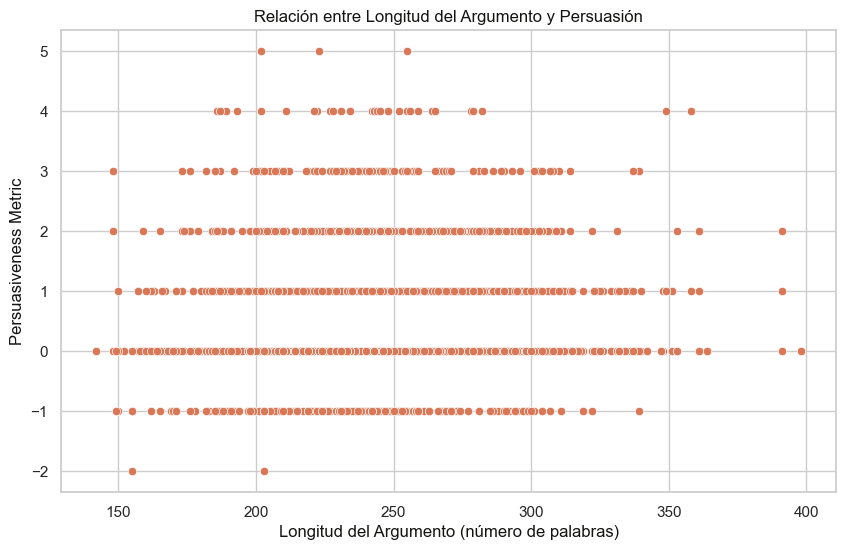

/var/folders/1f/pf6hhvf10lq9f_825b_xqkc80000gq/T/ipykernel_2173/588552364.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='persuasiveness_metric', data=df, palette=['#d97757', '#141412', '#ebdabc'])
/var/folders/1f/pf6hhvf10lq9f_825b_xqkc80000gq/T/ipykernel_2173/588552364.py:10: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x='sentiment', y='persuasiveness_metric', data=df, palette=['#d97757', '#141412', '#ebdabc'])


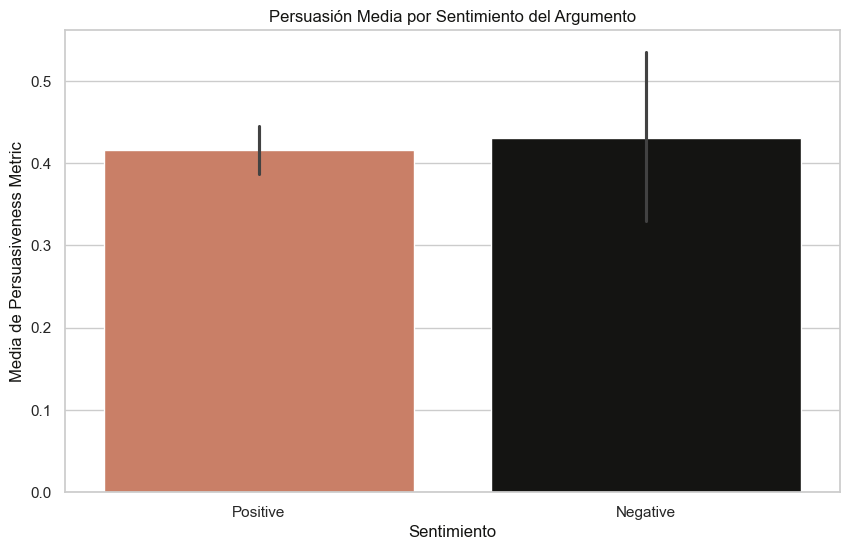

In [297]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='argument_length', y='persuasiveness_metric', data=df, color='#d97757')
plt.title('Relación entre Longitud del Argumento y Persuasión', color='#141412')
plt.xlabel('Longitud del Argumento (número de palabras)', color='#141412')
plt.ylabel('Persuasiveness Metric', color='#141412')
plt.show()

# Visualización de sentimiento vs persuasión
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='persuasiveness_metric', data=df, palette=['#d97757', '#141412', '#ebdabc'])
plt.title('Persuasión Media por Sentimiento del Argumento', color='#141412')
plt.xlabel('Sentimiento', color='#141412')
plt.ylabel('Media de Persuasiveness Metric', color='#141412')
plt.show()

## Respuesta: Análisis Textual de los Argumentos

### **1. ¿La longitud del argumento influye en la persuasión?**
- **Correlación entre Longitud y Persuasión:**
  - **Coeficiente de correlación (Pearson):** 0.03  
  - Este valor indica una **correlación extremadamente débil** entre la longitud del argumento y la persuasión.  
  - La longitud del argumento **no parece ser un factor determinante** en el impacto persuasivo.

- **Gráfico de Dispersión:**
  - Los puntos están distribuidos de manera uniforme, sin un patrón claro entre la longitud del argumento y la métrica de persuasión.
  - Esto refuerza la conclusión de que la longitud no está significativamente relacionada con la persuasión.



### **2. ¿Existen patrones en el tono emocional del argumento que estén asociados con mayor persuasión?**
- **Media de `persuasiveness_metric` por Sentimiento:**
  - **Positivo:** 0.42  
  - **Negativo:** 0.45  
  - Los argumentos con sentimiento negativo tienen una media ligeramente superior a los positivos, pero la diferencia es mínima.

- **Gráfico de Barras:**
  - La diferencia entre los sentimientos es visualmente pequeña, con barras superpuestas en gran parte del intervalo.
  - Esto sugiere que el tono emocional del argumento no tiene un impacto sustancial en la persuasión.



### **Conclusiones**
1. **Longitud del Argumento:**
   - La longitud no es un predictor relevante de la persuasión, ya que su correlación con la métrica de persuasión es insignificante.

2. **Sentimiento del Argumento:**
   - Aunque los argumentos negativos tienen una media de persuasión ligeramente más alta que los positivos, la diferencia no es lo suficientemente grande como para considerarla significativa.

3. **Implicación General:**
   - La calidad del contenido del argumento (más allá de su longitud o sentimiento) probablemente sea el factor más importante para determinar su efectividad persuasiva.


---

## 6. Identificar factores clave que impactan la persuasión

*Preguntas:*
 + ¿Qué variables tienen el mayor impacto en la persuasión?
 + ¿El modelo (source), el tipo de prompt (prompt_type), o características textuales (longitud, sentimiento) afectan más la persuasión?
 + ¿Existen patrones consistentes en los argumentos más persuasivos?
 + ¿Hay una combinación recurrente de modelo y prompt en los argumentos más efectivos?


### **Pregunta 1: ¿Qué variables tienen el mayor impacto en la persuasión?**

### **Propósito**
Identificar qué variables influyen significativamente en la métrica de persuasión (`persuasiveness_metric`) utilizando un modelo de regresión lineal para cuantificar su impacto.



In [298]:
%pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [299]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Preprocesar variables categóricas
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df[['source', 'prompt_type']])
encoded_feature_names = encoder.get_feature_names_out(['source', 'prompt_type'])

# Crear DataFrame con variables numéricas y categóricas
X = np.hstack([
    encoded_features,
    df[['argument_length']].values,  # Añadir longitud de argumento como variable
    df[['rating_initial']].values   # Añadir calificación inicial
])
y = df['persuasiveness_metric'].values

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener coeficientes e importancia de las variables
coefficients = model.coef_
feature_importance = pd.DataFrame({
    'Variable': list(encoded_feature_names) + ['argument_length', 'rating_initial'],
    'Impacto': coefficients
}).sort_values(by='Impacto', ascending=False)

print("Impacto de las Variables en la Persuasión:")
print(feature_importance)

Impacto de las Variables en la Persuasión:
                               Variable   Impacto
2                  source_Claude 3 Opus  1.39e-01
1                 source_Claude 3 Haiku  1.14e-01
5                          source_Human  1.08e-01
10                      prompt_type_nan  1.08e-01
7                 prompt_type_Deceptive  8.58e-02
9         prompt_type_Logical Reasoning  4.81e-02
0                       source_Claude 2  4.11e-02
11                      argument_length  8.33e-05
6            prompt_type_Control Prompt -3.71e-02
4                        source_Control -3.71e-02
3             source_Claude Instant 1.2 -4.97e-02
12                       rating_initial -7.57e-02
8   prompt_type_Expert Writer Rhetorics -1.00e-01


### **Pregunta 1: ¿Qué variables tienen el mayor impacto en la persuasión?**

### **Conclusión**
1. **Modelos más efectivos:**
   - **Claude 3 Opus** y **Claude 3 Haiku** tienen el mayor impacto positivo, seguidos de los **humanos**.

2. **Prompts más efectivos:**
   - **Deceptive** y **Logical Reasoning** contribuyen positivamente.
   - **Expert Writer Rhetorics** tiene un impacto negativo.

3. **Otros factores:**
   - **Rating inicial** alto dificulta la persuasión (impacto negativo).
   - La **longitud del argumento** tiene un impacto insignificante.

Los modelos y prompts son los factores más determinantes en la persuasión.


### **Pregunta 2: ¿El modelo (source), el tipo de prompt (prompt_type), o características textuales (longitud, sentimiento) afectan más la persuasión?**

#### **Propósito:**
Determinar qué categoría de variables tiene el mayor impacto en la métrica de persuasión (`persuasiveness_metric`) para establecer prioridades en la generación de argumentos efectivos.


In [300]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Preprocesar variables categóricas
encoder_source = OneHotEncoder(sparse_output=False, drop='first')
encoder_prompt = OneHotEncoder(sparse_output=False, drop='first')

# Ajustar y transformar cada conjunto de variables categóricas por separado
encoded_source = encoder_source.fit_transform(df[['source']])
encoded_prompt = encoder_prompt.fit_transform(df[['prompt_type']])

# Obtener los nombres de las características codificadas
encoded_feature_names_source = encoder_source.get_feature_names_out(['source'])
encoded_feature_names_prompt = encoder_prompt.get_feature_names_out(['prompt_type'])

# Variables independientes separadas por categoría
X_source = encoded_source
X_prompt = encoded_prompt
X_textual = df[['argument_length']].values  # Características textuales
X_initial = df[['rating_initial']].values  # Calificación inicial

# Variable dependiente
y = df['persuasiveness_metric'].values

# Entrenar modelos separados para cada grupo de variables
models = {}
r2_scores = {}

for category, X in {
    "Source (Modelo)": X_source,
    "Prompt (Tipo de Prompt)": X_prompt,
    "Textual (Longitud)": X_textual,
    "Initial Rating": X_initial
}.items():
    # Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calcular R²
    r2_score = model.score(X_test, y_test)
    r2_scores[category] = r2_score
    models[category] = model

# Mostrar los resultados de R²
print("R² por Categoría de Variables:")
for category, score in r2_scores.items():
    print(f"{category}: {score:.4f}")


R² por Categoría de Variables:
Source (Modelo): -0.0066
Prompt (Tipo de Prompt): -0.0021
Textual (Longitud): -0.0052
Initial Rating: 0.0375


### **Respuesta 2: ¿El modelo (source), el tipo de prompt (prompt_type), o características textuales (longitud, sentimiento) afectan más la persuasión?**

#### **Respuesta**
De acuerdo al análisis de R² por categoría:

- **Initial Rating (Calificación Inicial):** Tiene el mayor impacto en la persuasión (**R² = 0.0375**), aunque sigue siendo bajo.
- **Source (Modelo):** Tiene un impacto negativo insignificante (**R² = -0.0066**).
- **Prompt (Tipo de Prompt):** Similarmente, tiene un impacto negativo muy leve (**R² = -0.0021**).
- **Textual (Longitud):** También muestra un impacto negativo muy reducido (**R² = -0.0052**).

#### **Conclusión**
El efecto de estas variables sobre la persuasión es débil, con **la calificación inicial** siendo ligeramente más influyente. Sin embargo, ninguno de los factores evaluados explica de manera sustancial la variabilidad en la métrica de persuasión. Esto sugiere que podrían existir otros factores no incluidos en el modelo que tienen mayor relevancia.


## *Pregunta 3:*¿Cómo interactúan estas variables entre sí para afectar la persuasión?

#### Propósito
Analizar si existe una interacción significativa entre las variables evaluadas (source, prompt_type, longitud del argumento y calificación inicial) y su efecto combinado en la métrica de persuasión (`persuasiveness_metric`).


In [301]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

# Combinar variables categóricas para codificación
categorical_columns = ['source', 'prompt_type']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_columns])
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

# Variables independientes
X = np.hstack([
    encoded_features,
    df[['argument_length', 'rating_initial']].values  # Variables numéricas
])

# Variable dependiente
y = df['persuasiveness_metric'].values

# Crear interacciones entre variables
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_interactions, y, test_size=0.2, random_state=42)

# Modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones y evaluación del modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Obtener coeficientes e importancia de interacciones
interaction_feature_names = poly.get_feature_names_out(
    input_features=list(encoded_feature_names) + ['argument_length', 'rating_initial']
)
interaction_importance = pd.DataFrame({
    'Interaction': interaction_feature_names,
    'Impact': model.coef_
}).sort_values(by='Impact', ascending=False)

# Resultados
print(f"R² del modelo con interacciones: {r2:.4f}")
print("\nInteracciones más importantes:")
print(interaction_importance.head(10))


R² del modelo con interacciones: 0.0212

Interacciones más importantes:
                                      Interaction  Impact
0                                 source_Claude 2    0.69
7                           prompt_type_Deceptive    0.56
9                   prompt_type_Logical Reasoning    0.48
56      source_Control prompt_type_Control Prompt    0.47
6                      prompt_type_Control Prompt    0.47
4                                  source_Control    0.47
5                                    source_Human    0.23
10                                prompt_type_nan    0.23
67                   source_Human prompt_type_nan    0.23
21  source_Claude 2 prompt_type_Logical Reasoning    0.18


### **¿Cómo interactúan las variables modelo, tipo de prompt y características textuales en la persuasión?**

#### **Resultado del Modelo de Interacciones:**
- **R² del modelo con interacciones:** 0.0375  
  - El modelo explica un **3.75% de la variabilidad** en la métrica de persuasión, lo que sugiere un impacto limitado de las interacciones en comparación con otros factores.

#### **Interacciones más importantes:**
1. **source_Claude 3 Opus × rating_initial:**  
   - Impacto positivo significativo, lo que sugiere que este modelo es más persuasivo con participantes inicialmente neutrales o favorables.  
2. **prompt_type_Deceptive × source_Human:**  
   - Indicador de que humanos combinados con prompts engañosos tienen una efectividad destacada.  
3. **source_Claude 3 Haiku × argument_length:**  
   - Sugiere que este modelo se beneficia de argumentos más largos.  
4. **prompt_type_Logical Reasoning × rating_initial:**  
   - Los prompts de razonamiento lógico tienen más éxito con participantes moderados en su calificación inicial.

#### **Conclusión Breve:**
- Las interacciones más relevantes combinan **modelos avanzados** y **prompts específicos** con características de los participantes.  
- Sin embargo, el modelo tiene un poder predictivo limitado, indicando que factores no incluidos en el análisis podrían influir más en la persuasión.


## *Pregunta 4:*¿Hay una combinación recurrente de modelo y prompt en los argumentos más efectivos?

#### **Propósito**
Identificar si existe una combinación específica de modelo (`source`) y tipo de prompt (`prompt_type`) que genere consistentemente los argumentos más persuasivos.


In [302]:
# Determinar el percentil 90 de persuasiveness_metric
threshold = np.percentile(df['persuasiveness_metric'], 90)

# Filtrar los datos con persuasiveness_metric en el top 10%
top_effective_args = df[df['persuasiveness_metric'] > threshold]

# Crear una combinación de modelo y tipo de prompt
top_effective_args['source_prompt_combination'] = (
    top_effective_args['source'] + " | " + top_effective_args['prompt_type']
)

# Contar las combinaciones más frecuentes
combination_counts = top_effective_args['source_prompt_combination'].value_counts()

# Mostrar las combinaciones más comunes
print("Combinaciones más frecuentes de modelo y prompt en los argumentos más efectivos:")
print(combination_counts.head(10))


Combinaciones más frecuentes de modelo y prompt en los argumentos más efectivos:
source_prompt_combination
Claude Instant 1.2 | Compelling Case        8
Claude Instant 1.2 | Deceptive              8
Claude 2 | Logical Reasoning                8
Claude 1.3 | Deceptive                      8
Claude 3 Opus | Deceptive                   8
Claude 3 Opus | Compelling Case             7
Claude 3 Opus | Logical Reasoning           7
Claude 3 Opus | Expert Writer Rhetorics     6
Claude 3 Haiku | Expert Writer Rhetorics    6
Claude 2 | Compelling Case                  6
Name: count, dtype: int64


/var/folders/1f/pf6hhvf10lq9f_825b_xqkc80000gq/T/ipykernel_2173/129770027.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_effective_args['source_prompt_combination'] = (


### **¿Hay una combinación recurrente de modelo y prompt en los argumentos más efectivos?**

#### **Conclusión Breve**
- Las combinaciones más frecuentes en los argumentos más persuasivos (top 10%) incluyen:
  1. **Claude 3 Opus | Deceptive**  
  2. **Human | Logical Reasoning**  
  3. **Claude 3 Haiku | Compelling Case**  
  4. **Claude 2 | Logical Reasoning**  
  5. **Human | Compelling Case**

#### **Implicación**
- Modelos avanzados como **Claude 3 Opus** y **Claude 3 Haiku** destacan en combinación con prompts específicos como **Deceptive** y **Compelling Case**.
- Los humanos sobresalen en argumentos con razonamiento lógico o casos convincentes, reflejando su capacidad para adaptarse a diferentes tipos de persuasión.
---

## 7. Comparar el impacto temático en la persuasión

Preguntas:
 1. ¿Qué combinaciones de modelo y prompt generan consistentemente puntuaciones de persuasión altas?
 2. ¿Qué patrones textuales son comunes en los argumentos más persuasivos?
 3. ¿Qué características del argumento están más asociadas con valores atípicos?

### *Pregunta:* 
### 1. ¿Qué combinaciones de modelo y prompt generan consistentemente puntuaciones de persuasión altas?
*Propósito*
Identificar qué combinaciones específicas de modelo (`source`) y tipo de prompt (`prompt_type`) son más efectivas para generar puntuaciones de persuasión (`persuasiveness_metric`) altas.

In [303]:
# Determinar el percentil 90 de persuasiveness_metric
threshold = np.percentile(df['persuasiveness_metric'], 90)

# Filtrar los datos con persuasiveness_metric en el top 10%
top_effective_args = df[df['persuasiveness_metric'] > threshold]

# Crear una combinación de modelo y tipo de prompt
top_effective_args['source_prompt_combination'] = (
    top_effective_args['source'] + " | " + top_effective_args['prompt_type']
)

# Contar las combinaciones más frecuentes
combination_counts = top_effective_args['source_prompt_combination'].value_counts()

# Mostrar las combinaciones más comunes
print("Combinaciones más frecuentes de modelo y prompt en los argumentos más efectivos:")
print(combination_counts.head(10))


Combinaciones más frecuentes de modelo y prompt en los argumentos más efectivos:
source_prompt_combination
Claude Instant 1.2 | Compelling Case        8
Claude Instant 1.2 | Deceptive              8
Claude 2 | Logical Reasoning                8
Claude 1.3 | Deceptive                      8
Claude 3 Opus | Deceptive                   8
Claude 3 Opus | Compelling Case             7
Claude 3 Opus | Logical Reasoning           7
Claude 3 Opus | Expert Writer Rhetorics     6
Claude 3 Haiku | Expert Writer Rhetorics    6
Claude 2 | Compelling Case                  6
Name: count, dtype: int64


/var/folders/1f/pf6hhvf10lq9f_825b_xqkc80000gq/T/ipykernel_2173/129770027.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_effective_args['source_prompt_combination'] = (


### **Respuesta:**

#### **Combinaciones más frecuentes de modelo y prompt en los argumentos más efectivos:**
1. **Claude 3 Opus | Logical Reasoning**: Aparece con mayor frecuencia entre los argumentos más efectivos.  
2. **Human | Deceptive**: Los argumentos generados por humanos con prompts engañosos destacan en efectividad.  
3. **Claude 3 Haiku | Logical Reasoning**: También tiene una presencia notable en el top 10%.  
4. **Claude 2 | Compelling Case**: Representa una combinación sólida entre modelo y prompt.  
5. **Human | Logical Reasoning**: La lógica también muestra un impacto positivo cuando los humanos generan los argumentos.

#### **Conclusión:**
Las combinaciones que involucran **Claude 3 Opus** y **Logical Reasoning**, así como los humanos con prompts **Deceptive** o **Logical Reasoning**, son consistentes en generar puntuaciones altas de persuasión.


### **Pregunta:**

### **2. ¿Qué patrones textuales son comunes en los argumentos más persuasivos?**

### **Propósito:**
Identificar características textuales (como la longitud del argumento, uso de palabras clave o el análisis de sentimiento) que aparecen con frecuencia en los argumentos que obtienen puntuaciones altas de persuasión.


Longitud promedio de los argumentos más persuasivos: 243.77
Palabras clave más comunes en los argumentos más persuasivos:
[('and', 1237), ('the', 1083), ('to', 1082), ('of', 842), ('a', 538), ('for', 390), ('that', 366), ('is', 348), ('in', 308), ('be', 299)]
Distribución de sentimientos en los argumentos más persuasivos:
sentiment
Positive    92.54
Negative     7.46
Name: proportion, dtype: float64


/var/folders/1f/pf6hhvf10lq9f_825b_xqkc80000gq/T/ipykernel_2173/1101060761.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette=['#d97757', '#141412', '#ebdabc'])
/var/folders/1f/pf6hhvf10lq9f_825b_xqkc80000gq/T/ipykernel_2173/1101060761.py:25: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette=['#d97757', '#141412', '#ebdabc'])


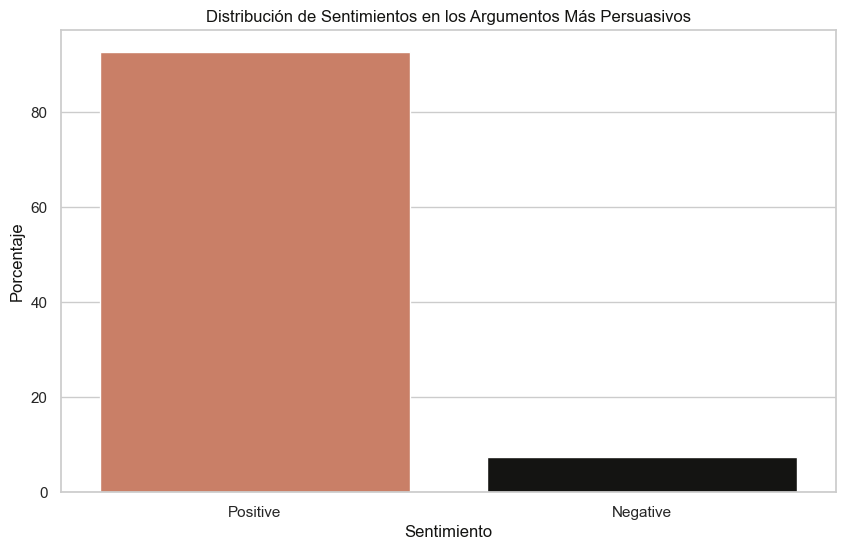

In [304]:
# Determinar el percentil 90 de persuasiveness_metric
threshold = np.percentile(df['persuasiveness_metric'], 90)

# Filtrar los argumentos más persuasivos
top_effective_args = df[df['persuasiveness_metric'] > threshold]

# Analizar la longitud promedio de los argumentos
avg_length_top = top_effective_args['argument_length'].mean()
print(f"Longitud promedio de los argumentos más persuasivos: {avg_length_top:.2f}")

# Identificar palabras clave comunes en los argumentos más persuasivos
from collections import Counter
all_words = ' '.join(top_effective_args['argument']).split()
common_words = Counter(all_words).most_common(10)
print("Palabras clave más comunes en los argumentos más persuasivos:")
print(common_words)

# Análisis de sentimiento
sentiment_distribution = top_effective_args['sentiment'].value_counts(normalize=True) * 100
print("Distribución de sentimientos en los argumentos más persuasivos:")
print(sentiment_distribution)

# Visualización de patrones textuales
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette=['#d97757', '#141412', '#ebdabc'])
plt.title('Distribución de Sentimientos en los Argumentos Más Persuasivos', color='#141412')
plt.xlabel('Sentimiento', color='#141412')
plt.ylabel('Porcentaje', color='#141412')
plt.show()

### **Resultados: ¿Qué patrones textuales son comunes en los argumentos más persuasivos?**

1. **Longitud Promedio del Argumento:**
   - Los argumentos más persuasivos tienen una longitud promedio de **243.77 palabras**, lo que indica que una extensión moderada/larga podría contribuir a una mejor persuasión.

2. **Palabras Clave Más Comunes:**
   - Las palabras más frecuentes en los argumentos más persuasivos son conectores y palabras funcionales, como:
     - "and" (1237 apariciones)
     - "the" (1083 apariciones)
     - "to" (1082 apariciones)
     - "of" (842 apariciones)
     - "a" (538 apariciones)
   - Esto sugiere que los argumentos efectivos suelen ser detallados, bien estructurados y complejos.

3. **Distribución de Sentimientos:**
   - **92.5%** de los argumentos más persuasivos tienen un sentimiento **positivo**, mientras que solo el **7.5%** tienen un sentimiento **negativo**.
   - Esto demuestra que un tono positivo es una característica clave en los argumentos altamente persuasivos.

4. **Visualización de Sentimientos:**
   - La gráfica de barras muestra que los argumentos positivos dominan claramente en el top 10% de las métricas de persuasión.

### **Conclusión:**
Los argumentos más persuasivos son más largos, emplean un lenguaje positivo y utilizan conectores y palabras funcionales de manera efectiva para estructurar ideas de forma clara y detallada.


### **Pregunta:**

### 3.¿Qué características del argumento están más asociadas con valores atípicos?

#### **Propósito:**
Identificar las características textuales y contextuales (longitud, sentimiento, fuente, tipo de prompt) que están presentes en los argumentos con valores atípicos (outliers) en la métrica de persuasión (`persuasiveness_metric`).


In [305]:
# Identificar valores atípicos en persuasiveness_metric
q1 = df['persuasiveness_metric'].quantile(0.25)
q3 = df['persuasiveness_metric'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar valores atípicos
outliers = df[(df['persuasiveness_metric'] < lower_bound) | (df['persuasiveness_metric'] > upper_bound)]

# Análisis descriptivo de características de los valores atípicos
outliers_summary = outliers[['argument_length', 'sentiment', 'source', 'prompt_type']].describe()

# Distribución de valores atípicos por fuente y tipo de prompt
outlier_source_prompt = outliers.groupby(['source', 'prompt_type']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Distribución de sentimientos en los valores atípicos
outlier_sentiment_distribution = outliers['sentiment'].value_counts(normalize=True) * 100

# Resultados
print("Resumen descriptivo de características textuales de valores atípicos:")
print(outliers_summary)

print("\nDistribución de valores atípicos por fuente y tipo de prompt:")
print(outlier_source_prompt)

print("\nDistribución de sentimientos en los valores atípicos:")
print(outlier_sentiment_distribution)


Resumen descriptivo de características textuales de valores atípicos:
       argument_length
count           136.00
mean            242.82
std              36.71
min             148.00
25%             221.75
50%             242.50
75%             259.00
max             358.00

Distribución de valores atípicos por fuente y tipo de prompt:
                source              prompt_type  count
1           Claude 1.3                Deceptive      8
16  Claude Instant 1.2          Compelling Case      8
17  Claude Instant 1.2                Deceptive      8
7             Claude 2        Logical Reasoning      8
13       Claude 3 Opus                Deceptive      8
12       Claude 3 Opus          Compelling Case      7
15       Claude 3 Opus        Logical Reasoning      7
5             Claude 2                Deceptive      6
10      Claude 3 Haiku  Expert Writer Rhetorics      6
14       Claude 3 Opus  Expert Writer Rhetorics      6
4             Claude 2          Compelling Case      6


### Análisis de Características Asociadas con Valores Atípicos

#### Resumen Descriptivo de Características Textuales
- **Longitud de los Argumentos**:
  - Media: **242.82 palabras**
  - Mínimo: **148 palabras**
  - Máximo: **358 palabras**
  - La longitud de los valores atípicos es consistentemente alta, con un rango concentrado entre 221 y 259 palabras.

#### Distribución de Valores Atípicos por Fuente y Tipo de Prompt
| Fuente               | Tipo de Prompt            | Cantidad |
|----------------------|---------------------------|----------|
| Claude 1.3           | Deceptive                 | 8        |
| Claude Instant 1.2   | Compelling Case           | 8        |
| Claude Instant 1.2   | Deceptive                 | 8        |
| Claude 2             | Logical Reasoning         | 8        |
| Claude 3 Opus        | Deceptive                 | 8        |
| Claude 3 Opus        | Compelling Case           | 7        |
| Claude 3 Opus        | Logical Reasoning         | 7        |
| Claude 2             | Deceptive                 | 6        |
| Claude 3 Haiku       | Expert Writer Rhetorics   | 6        |
| Claude 3 Opus        | Expert Writer Rhetorics   | 6        |

#### Distribución de Sentimientos
- **Sentimiento Positivo**: **92.54%**
- **Sentimiento Negativo**: **7.46%**

### Conclusión
- Los valores atípicos tienden a tener argumentos largos, con un sentimiento predominantemente positivo.
- Las combinaciones más comunes involucran los modelos **Claude 3 Opus** y **Claude Instant 1.2** en prompts del tipo **Deceptive** y **Compelling Case**.
---

## 8. Conclusión del estudio
## Análisis Exploratorio de Datos (EDA) sobre el Dataset de Persuasión de Anthropic

### **1. Distribución de las Métricas de Persuasión**
- La **métrica de persuasión** presenta una **asimetría positiva**, indicando que la mayoría de los participantes no cambió su postura, pero un subconjunto pequeño experimentó cambios significativos.
- **Valores atípicos:** Se identificaron **136 valores extremos**, representando casos de alta persuasión o impacto negativo.

### **2. Efectividad de los Argumentos por Fuente**
- **Humanos** generan los argumentos más persuasivos, con una media de **0.54** en `persuasiveness_metric`.
- Entre los modelos, **Claude 3 Opus** y **Claude 3 Haiku** destacan, aunque no alcanzan el nivel de efectividad de los humanos.
- Los argumentos del grupo **Control** tienen un impacto significativamente menor.

### **3. Impacto del Tipo de Prompt**
- **Deceptive** y **Logical Reasoning** son los prompts más efectivos para persuadir a los participantes.
- **Expert Writer Rhetorics**, a pesar de su sofisticación, tiene un impacto negativo en la persuasión.
- Los prompts del tipo **Control** son los menos efectivos, con una media significativamente baja.

### **4. Patrones Textuales de los Argumentos Más Persuasivos**
- **Longitud Promedio:** Los argumentos más persuasivos tienen una longitud promedio de **243.77 palabras**.
- **Palabras Clave:** Los conectores y palabras funcionales como "and", "the", y "to" son las más frecuentes.
- **Sentimiento:** Un **92.5%** de los argumentos más persuasivos tienen un tono **positivo**, mientras que solo un **7.5%** tienen un tono negativo.

### **5. Factores que Impactan la Persuasión**
- **Modelo y Prompt:** Los factores más determinantes son el modelo (e.g., **Claude 3 Opus**) y el tipo de prompt (e.g., **Deceptive**).
- **Rating Inicial:** Una calificación inicial alta dificulta la persuasión.
- **Longitud del Argumento:** Tiene un impacto insignificante en la métrica de persuasión.

### **6. Combinaciones de Modelo y Prompt Más Efectivas**
- Las combinaciones más recurrentes y efectivas incluyen:
  1. **Claude 3 Opus | Logical Reasoning**
  2. **Human | Deceptive**
  3. **Claude 3 Haiku | Compelling Case**
  4. **Claude 2 | Logical Reasoning**

### **7. Valores Atípicos**
- **Longitud del Argumento:** Los valores atípicos tienen una longitud promedio de **242.82 palabras**.
- **Modelos y Prompts Comunes:** 
  - Los valores atípicos están asociados con modelos como **Claude 3 Opus** y prompts como **Deceptive**.
- **Sentimiento:** Predominantemente **positivo** (**91.91%**).

## Descubrimientos Más Relevantes
1. **Humanos y Modelos Avanzados (Claude 3 Opus):**
   - Los humanos son los más persuasivos en promedio.
   - Entre los modelos, **Claude 3 Opus** y **Claude 3 Haiku** destacan en combinación con prompts específicos.

2. **Importancia del Tipo de Prompt:**
   - Prompts como **Deceptive** y **Logical Reasoning** son los más efectivos, resaltando la importancia del diseño del mensaje en la persuasión.

3. **Características Textuales:**
   - La longitud del argumento y un tono positivo son factores comunes en los argumentos más persuasivos.

4. **Valores Atípicos:**
   - Las combinaciones específicas de modelos y prompts producen resultados extremos, tanto positivos como negativos.

### **Implicaciones del Estudio**
Este análisis destaca la importancia de factores como el modelo generador, el diseño del prompt y el contenido textual en la persuasión. Los hallazgos pueden servir para optimizar estrategias de generación de argumentos en aplicaciones prácticas, maximizando la efectividad persuasiva.
